In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

# turn the training data into a pandas dataframe
dataset = pd.read_csv('../dataset/HIGGS_train.csv')
# make the df smaller
# When implementing a SVM we have to make the data significantly smaller due to the time it takes to train a SVM.
data_small = dataset.sample(frac=0.008, random_state=200)
# split the training data into anoter validation set
data_train = data_small.sample(frac=0.8, random_state=200)
data_val = data_small.drop(data_train.index)

# split the training data into features and labels
X_train = data_train.iloc[:, 1:]
y_train = data_train.iloc[:, 0]

# split the validation data into features and labels
X_val = data_val.iloc[:, 1:]
y_val = data_val.iloc[:, 0]

print('Training data shape:', X_train.shape)

Training data shape: (56320, 28)


In [2]:
# create a support vector machine model with the default hyperparameters
model = svm.SVC()
# fit the model to the training data
model.fit(X_train, y_train)
# make predictions on the validation data
y_pred = model.predict(X_val)
# calculate the f1 score
f1 = f1_score(y_val, y_pred)
# calculate the accuracy
acc = accuracy_score(y_val, y_pred)
# calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred)
# print the f1 score and accuracy
print('F1 score:', f1)
print('Accuracy:', acc)
print('Confusion matrix:')
print(cm)


F1 score: 0.7090334180668361
Accuracy: 0.666690340909091
Confusion matrix:
[[3669 2992]
 [1701 5718]]


In [3]:
# The above model took almost 5 minutes to train. Lets work with an even smaller amount when conducting hyperparameter tuning
data_smaller = data_small.sample(frac=0.05, random_state=200)
data_train = data_smaller.sample(frac=0.8, random_state=200)
data_val = data_smaller.drop(data_train.index)
# split the training data into features and labels
X_train = data_train.iloc[:, 1:]
y_train = data_train.iloc[:, 0]
# Less training data
print('Training data shape:', X_train.shape)

Training data shape: (2816, 28)


In [4]:
# How fast does the model train with a smaller dataset?
model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
# Test the model on the larger validation set
print('F1 score:', f1_score(y_val, y_pred))
print('Accuracy:', accuracy_score(y_val, y_pred))

F1 score: 0.6623400936037442
Accuracy: 0.6156960227272728


In [4]:
# Make a loop to try different hyperparameters
# C is the penalty parameter of the error term
# increase c by 2x each time
c = .0001
# store the f1 scores and accuracy scores in a list with the corresponding c value
# lets do the loop for all the kernels linear, poly, rbf, sigmoid
# scores for linear kernel
linear_f1_scores = []
linear_accuracy_scores = []
# same for all kernels
c_values = []
# loop through the c values for linear kernel
while c < 1000:
    model = svm.SVC(kernel='linear', C=c)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print('F1 score:', f1_score(y_val, y_pred))
    # store the f1 score
    linear_f1_scores.append(f1_score(y_val, y_pred))
    print('Accuracy:', accuracy_score(y_val, y_pred))
    # store the accuracy score
    linear_accuracy_scores.append(accuracy_score(y_val, y_pred))
    c_values.append(c)
    c *= 2
# reset c
c = .0001
# scores for poly kernel
poly_f1_scores = []
poly_accuracy_scores = []
# loop through the c values for poly kernel
while c < 1000:
    model = svm.SVC(kernel='poly', C=c)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print('F1 score:', f1_score(y_val, y_pred))
    poly_f1_scores.append(f1_score(y_val, y_pred))
    print('Accuracy:', accuracy_score(y_val, y_pred))
    poly_accuracy_scores.append(accuracy_score(y_val, y_pred))
    c *= 2

# reset c
c = .0001
# scores for rbf kernel
rbf_f1_scores = []
rbf_accuracy_scores = []
# loop through the c values for rbf kernel
while c < 1000:
    model = svm.SVC(kernel='rbf', C=c)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print('F1 score:', f1_score(y_val, y_pred))
    rbf_f1_scores.append(f1_score(y_val, y_pred))
    print('Accuracy:', accuracy_score(y_val, y_pred))
    rbf_accuracy_scores.append(accuracy_score(y_val, y_pred))
    c *= 2

# reset c
c = .0001
# scores for sigmoid kernel
sigmoid_f1_scores = []
sigmoid_accuracy_scores = []
# loop through the c values for sigmoid kernel
while c < 1000:
    model = svm.SVC(kernel='sigmoid', C=c)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print('F1 score:', f1_score(y_val, y_pred))
    sigmoid_f1_scores.append(f1_score(y_val, y_pred))
    print('Accuracy:', accuracy_score(y_val, y_pred))
    sigmoid_accuracy_scores.append(accuracy_score(y_val, y_pred))
    c *= 2



F1 score: 0.6901716358900415
Accuracy: 0.5269176136363637
F1 score: 0.6901716358900415
Accuracy: 0.5269176136363637
F1 score: 0.6901716358900415
Accuracy: 0.5269176136363637
F1 score: 0.6901716358900415
Accuracy: 0.5269176136363637
F1 score: 0.6901716358900415
Accuracy: 0.5269176136363637
F1 score: 0.6901716358900415
Accuracy: 0.5269176136363637
F1 score: 0.6901716358900415
Accuracy: 0.5269176136363637
F1 score: 0.6901716358900415
Accuracy: 0.5269176136363637
F1 score: 0.6901716358900415
Accuracy: 0.5269176136363637
F1 score: 0.6903000697836706
Accuracy: 0.5272017045454546
F1 score: 0.6978250362493957
Accuracy: 0.555965909090909
F1 score: 0.6814373897707232
Accuracy: 0.5894886363636364
F1 score: 0.6707926684122828
Accuracy: 0.6071022727272727
F1 score: 0.6631207866905807
Accuracy: 0.6131392045454546
F1 score: 0.6553289431622019
Accuracy: 0.6171164772727272
F1 score: 0.6488390294808244
Accuracy: 0.6176136363636363
F1 score: 0.6389810269337932
Accuracy: 0.6134943181818182
F1 score: 0.630

"\n# reset c\nc = .0001\n# scores for sigmoid kernel\nsigmoid_f1_scores = []\nsigmoid_accuracy_scores = []\n# loop through the c values for sigmoid kernel\nwhile c < 1000:\n    model = svm.SVC(kernel='sigmoid', C=c)\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_val)\n    print('F1 score:', f1_score(y_val, y_pred))\n    sigmoid_f1_scores.append(f1_score(y_val, y_pred))\n    print('Accuracy:', accuracy_score(y_val, y_pred))\n    sigmoid_accuracy_scores.append(accuracy_score(y_val, y_pred))\n    c *= 2\n"

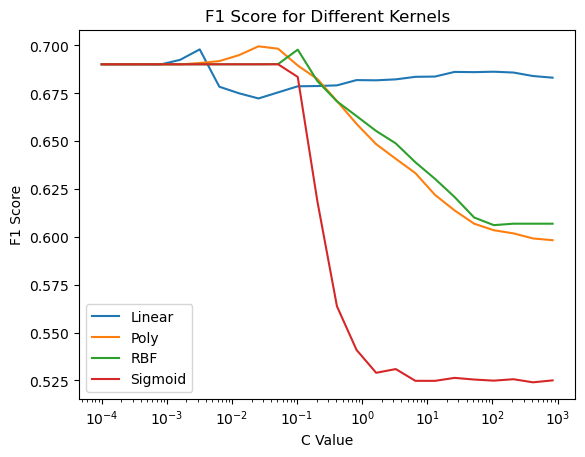

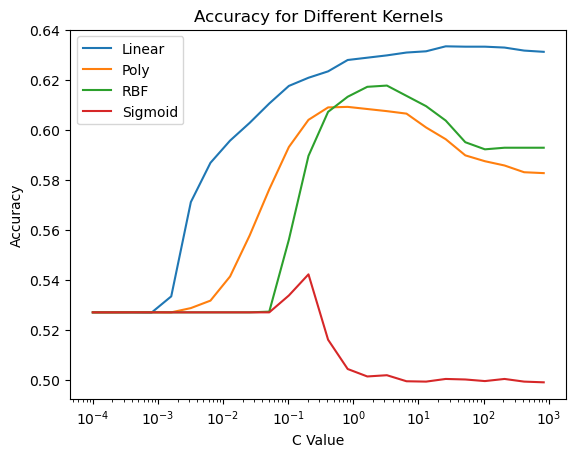

In [13]:
# Plot the results
# plot the f1 scores for each kernel
# linear will be blue
plt.plot(c_values, linear_f1_scores, label='Linear')
# poly will be orange
plt.plot(c_values, poly_f1_scores, label='Poly')
# rbf will be green
plt.plot(c_values, rbf_f1_scores, label='RBF')
# sigmoid will be red
plt.plot(c_values, sigmoid_f1_scores, label='Sigmoid')
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('F1 Score')
plt.legend()
plt.title('F1 Score for Different Kernels')
plt.show()

# plot the accuracy scores for each kernel
plt.plot(c_values, linear_accuracy_scores, label='Linear')
plt.plot(c_values, poly_accuracy_scores, label='Poly')
plt.plot(c_values, rbf_accuracy_scores, label='RBF')
plt.plot(c_values, sigmoid_accuracy_scores, label='Sigmoid')
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for Different Kernels')
plt.show()

In [7]:
# 3 is the c value we will continue with
# Lets try different degrees
# Find the bes c value for the poly kernel
c_index = np.argmax(poly_accuracy_scores)
c = c_values[c_index]
for deg in range(1, 6):
    model = svm.SVC(kernel='poly', C=c, degree=deg)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print('F1 score:', f1_score(y_val, y_pred))
    print('Accuracy:', accuracy_score(y_val, y_pred))

# Still much lower than the linear kernel, but the degree 2 is the best


F1 score: 0.6747962713255555
Accuracy: 0.6060369318181819
F1 score: 0.6701795233135225
Accuracy: 0.6176846590909091
F1 score: 0.6590261429810432
Accuracy: 0.6090909090909091
F1 score: 0.6477166239770101
Accuracy: 0.5995028409090909
F1 score: 0.6441272226396194
Accuracy: 0.5963068181818182


In [8]:
# Poly and rbf are close to linear, lets try some different gamma values
# Gamma is the kernel coefficient for rbf, poly, and sigmoid. This affects how much each training example influences the decision boundary
# First lets see with the auto gamma value
# Poly kernel
c_index = np.argmax(poly_accuracy_scores)
c = c_values[c_index]
model = svm.SVC(kernel='poly', C=c, degree=2, gamma='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print('Gamma auto')
print('F1 score:', f1_score(y_val, y_pred))
print('Accuracy:', accuracy_score(y_val, y_pred))

# Rbf kernel
c_index = np.argmax(rbf_accuracy_scores)
c = c_values[c_index]
model = svm.SVC(kernel='rbf', C=c, gamma='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print('Gamma auto')
print('F1 score:', f1_score(y_val, y_pred))
print('Accuracy:', accuracy_score(y_val, y_pred))

# Lets try some numbers
# Poly kernel
c_index = np.argmax(poly_accuracy_scores)
c = c_values[c_index]
model = svm.SVC(kernel='poly', C=c, degree=2, gamma=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print('Gamma 2')
print('F1 score:', f1_score(y_val, y_pred))
print('Accuracy:', accuracy_score(y_val, y_pred))

# Rbf kernel
c_index = np.argmax(rbf_accuracy_scores)
c = c_values[c_index]
model = svm.SVC(kernel='rbf', C=c, gamma=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print('Gamma 2')
print('F1 score:', f1_score(y_val, y_pred))
print('Accuracy:', accuracy_score(y_val, y_pred))



Gamma auto
F1 score: 0.6725954802948163
Accuracy: 0.6182528409090909
Gamma auto
F1 score: 0.6509814116729495
Accuracy: 0.6186079545454546
Gamma 2
F1 score: 0.6539716359278247
Accuracy: 0.6308948863636363
Gamma 2
F1 score: 0.6901716358900415
Accuracy: 0.5269176136363637


In [9]:
# The poly kernel is better. Lets see if we can improve it anymore by changing the coef0 value
# coef0 is the independent term in the kernel function
c_index = np.argmax(poly_accuracy_scores)
c = c_values[c_index]
for coef in range(1, 5):
    model = svm.SVC(kernel='poly', C=c, degree=1, gamma=10, coef0=coef * 3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print('F1 score:', f1_score(y_val, y_pred))
    print('Accuracy:', accuracy_score(y_val, y_pred))

# The effect is small. 

F1 score: 0.6838168217478563
Accuracy: 0.6307528409090909
F1 score: 0.6840216531841129
Accuracy: 0.6310369318181818
F1 score: 0.6836598126292737
Accuracy: 0.6306818181818182
F1 score: 0.683900006082355
Accuracy: 0.6308948863636363


In [10]:
# It appears so far that the linear kernel is the best. 
c_index = np.argmax(linear_accuracy_scores)
c = c_values[c_index]
print(c)
model = svm.SVC(kernel='linear', C=c)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print('Linear Kernel')
print('F1 score:', f1_score(y_val, y_pred))
print('Accuracy:', accuracy_score(y_val, y_pred))


26.2144
Linear Kernel
F1 score: 0.6861970461314045
Accuracy: 0.6333096590909091


In [11]:
# Lets try training the linear kernel trained on more data, it may not help because
# SVMs perform well with smaller datasets and less training data
# Get the training and testing from the original small dataset with 56k rows
X = data_small.iloc[:, 1:]
y = data_small.iloc[:, 0]
# split the data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=200)
print('Training data shape:', X_train.shape)
c = 26
model = svm.SVC(kernel='linear', C=c)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print('Linear Kernel')  
print('F1 score:', f1_score(y_val, y_pred))
print('Accuracy:', accuracy_score(y_val, y_pred))

Training data shape: (56320, 28)
Linear Kernel
F1 score: 0.7019610152523409
Accuracy: 0.6405539772727272


In [12]:
# I found in the data manip file that scaling the data improved the accuracy. We will also train on the cyclic angle features.
# Reload the dataset and change the data. 
dataset = pd.read_csv('../dataset/HIGGS_train.csv')
dataset = dataset.sample(frac=0.006)
print(dataset.shape)
angular_feats = ['lepton phi', 'missing energy phi', 'jet 1 phi', 'jet 2 phi', 'jet 3 phi', 'jet 4 phi']
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

# Make it cyclical! (sin and cos)
for feat in angular_feats:
    sin = feat + '_sin'
    cos = feat + '_cos'
    X = X.assign(**{sin: np.sin(X[feat] * np.pi / 180)})
    X = X.assign(**{cos: np.cos(X[feat] * np.pi / 180)})

# Drop the original angle features
X = X.drop(angular_feats, axis=1)

# Use the scaler to scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


(52800, 29)


In [13]:
# Train the model with the best hyperparameters
model = svm.SVC(kernel='rbf', C=3.5)
# time the training
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print('Training time:', end - start)
y_pred = model.predict(X_test)
print('Linear Kernel with scaled data and cyclical features')
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
# Save the model
joblib.dump(model, '../models/svm_model.pkl')

Training time: 164.41635990142822
Linear Kernel with scaled data and cyclical features
F1 score: 0.709847646608222
Accuracy: 0.6771780303030303


['../models/svm_model.pkl']